# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key as api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vallenar
Processing Record 2 of Set 1 | anibare
City not found. Skipping...
Processing Record 3 of Set 1 | maceio
Processing Record 4 of Set 1 | oppdal
Processing Record 5 of Set 1 | isangel
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | mamuju
Processing Record 10 of Set 1 | ijuw
City not found. Skipping...
Processing Record 11 of Set 1 | coyhaique
Processing Record 12 of Set 1 | queenstown
Processing Record 13 of Set 1 | lazaro cardenas
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | ambodifotatra
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | uturoa

Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | oranjemund
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | dalandzadgad
Processing Record 45 of Set 4 | labuan lombok
City not found. Skipping...
Processing Record 46 of Set 4 | tromso
Processing Record 47 of Set 4 | brisas de zicatela
Processing Record 48 of Set 4 | wailua homesteads
Processing Record 49 of Set 4 | karratha
Processing Record 0 of Set 5 | denov
Processing Record 1 of Set 5 | marudi
City not found. Skipping...
Processing Record 2 of Set 5 | ginir
Processing Record 3 of Set 5 | morant bay
Processing Record 4 of Set 5 | punta arenas
Processing Record 5 of Set 5 | pires do rio
Processing Record 6 of Set 5 | weno
Processing Record 7 of Set 5 | hanceville
Processing Record 8 of Set 5 | garmisch-partenkirchen
Processing Record 9 of Set 5 | hobyo
Processing Record 10 of Set 5 | revelstoke
Processing Record 11 of Set 5 | bethanie
Processing Record 12 of Set 5 | xilin hot
Pr

Processing Record 26 of Set 8 | vila franca do campo
Processing Record 27 of Set 8 | broken hill
Processing Record 28 of Set 8 | pasil
Processing Record 29 of Set 8 | san patricio
Processing Record 30 of Set 8 | labrador city
Processing Record 31 of Set 8 | kungsbacka
Processing Record 32 of Set 8 | shache
Processing Record 33 of Set 8 | alesund
Processing Record 34 of Set 8 | yorkton
Processing Record 35 of Set 8 | naze
Processing Record 36 of Set 8 | chonchi
Processing Record 37 of Set 8 | saint-francois
Processing Record 38 of Set 8 | tsubata
Processing Record 39 of Set 8 | borzya
Processing Record 40 of Set 8 | saudarkrokur
Processing Record 41 of Set 8 | rimouski
Processing Record 42 of Set 8 | powell
Processing Record 43 of Set 8 | looe
Processing Record 44 of Set 8 | kegalle
Processing Record 45 of Set 8 | shilka
Processing Record 46 of Set 8 | freeport
Processing Record 47 of Set 8 | emirgazi
Processing Record 48 of Set 8 | paita
Processing Record 49 of Set 8 | san andros
City 

Processing Record 17 of Set 12 | khamharia
Processing Record 18 of Set 12 | la passe
Processing Record 19 of Set 12 | coahuayana de hidalgo
Processing Record 20 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 21 of Set 12 | xindi
Processing Record 22 of Set 12 | bantilan
Processing Record 23 of Set 12 | conceicao do araguaia
Processing Record 24 of Set 12 | hammerfest
Processing Record 25 of Set 12 | north platte
Processing Record 26 of Set 12 | island harbour
Processing Record 27 of Set 12 | butte
Processing Record 28 of Set 12 | manicore
Processing Record 29 of Set 12 | el fuerte
Processing Record 30 of Set 12 | juan griego
Processing Record 31 of Set 12 | namdrik
Processing Record 32 of Set 12 | byron bay
Processing Record 33 of Set 12 | ostersund
Processing Record 34 of Set 12 | lorengau
Processing Record 35 of Set 12 | as sulayyil
Processing Record 36 of Set 12 | coxen hole
Processing Record 37 of Set 12 | luanco
Processing Record 38 of Set 12 | sarkand


In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vallenar,-28.5708,-70.7581,294.25,39,100,1.82,CL,1691589045
1,maceio,-9.6658,-35.7353,298.84,73,75,5.14,BR,1691589046
2,oppdal,62.5943,9.6912,285.91,70,98,6.81,NO,1691589046
3,isangel,-19.5500,169.2667,293.33,72,70,6.06,VU,1691589046
4,margaret river,-33.9500,115.0667,284.48,69,74,0.87,AU,1691588864


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vallenar,-28.5708,-70.7581,294.25,39,100,1.82,CL,1691589045
1,maceio,-9.6658,-35.7353,298.84,73,75,5.14,BR,1691589046
2,oppdal,62.5943,9.6912,285.91,70,98,6.81,NO,1691589046
3,isangel,-19.5500,169.2667,293.33,72,70,6.06,VU,1691589046
4,margaret river,-33.9500,115.0667,284.48,69,74,0.87,AU,1691588864


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

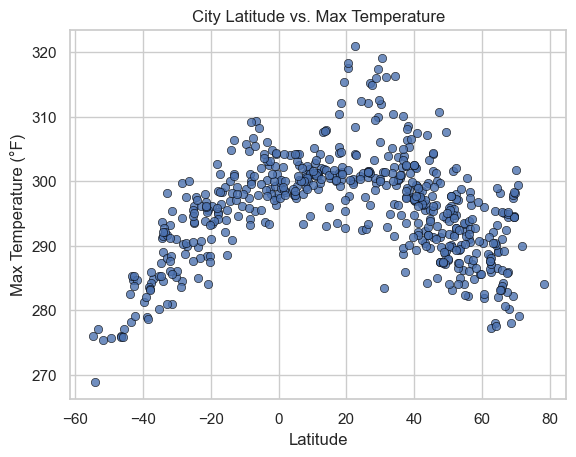

In [34]:
import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid')


plot = sns.scatterplot(x='Lat', y='Max Temp', data=city_data_df, edgecolor="black", alpha=0.8)
plot.set(title='City Latitude vs. Max Temperature', xlabel='Latitude', ylabel='Max Temperature (°F)')



# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

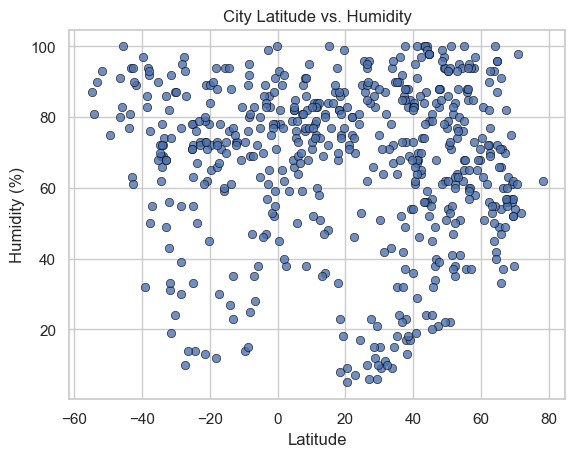

In [35]:
plot = sns.scatterplot(x='Lat', y='Humidity', data=city_data_df, edgecolor="black", alpha=0.8)
plot.set(title='City Latitude vs. Humidity', xlabel='Latitude', ylabel='Humidity (%)')


# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
# plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

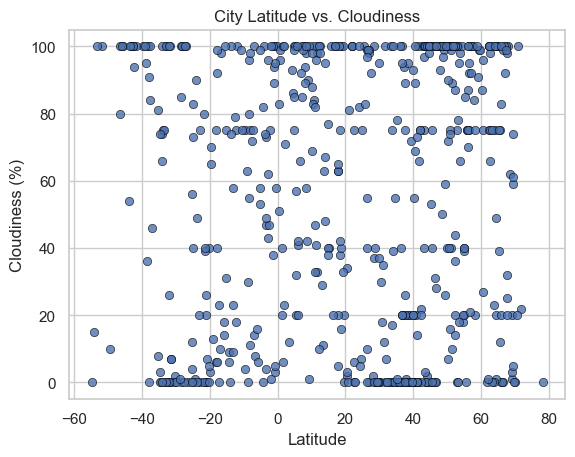

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plot = sns.scatterplot(x='Lat', y='Cloudiness', data=city_data_df, edgecolor="black", alpha=0.8)
plot.set(title='City Latitude vs. Cloudiness', xlabel='Latitude', ylabel='Cloudiness (%)')


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
# plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

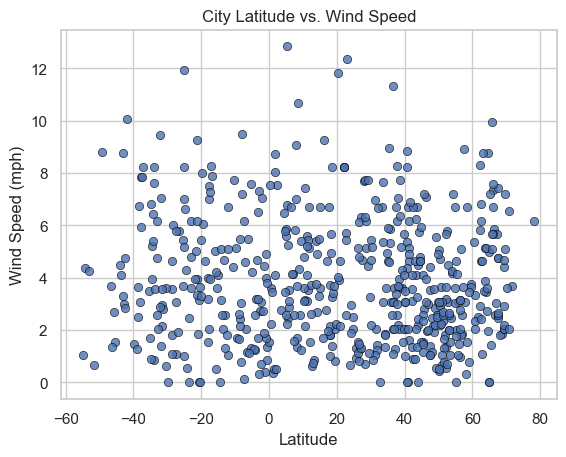

In [37]:

plot = sns.scatterplot(x='Lat', y='Wind Speed', data=city_data_df, edgecolor="black", alpha=0.8)
plot.set(title='City Latitude vs. Wind Speed', xlabel='Latitude', ylabel='Wind Speed (mph)')

# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
# plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def linear_regression(x_values, y_values):
    # Calculate the linear regression model
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    return slope, intercept, r_value, p_value, std_err


In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,oppdal,62.5943,9.6912,285.91,70,98,6.81,NO,1691589046
5,tiksi,71.6872,128.8694,289.87,53,22,3.67,RU,1691589047
10,lazaro cardenas,17.9583,-102.2000,301.28,82,63,1.80,MX,1691589048
11,college,64.8569,-147.8028,289.12,96,100,0.00,US,1691589048
14,aasiaat,68.7098,-52.8699,277.97,75,62,1.86,GL,1691589049


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vallenar,-28.5708,-70.7581,294.25,39,100,1.82,CL,1691589045
1,maceio,-9.6658,-35.7353,298.84,73,75,5.14,BR,1691589046
3,isangel,-19.5500,169.2667,293.33,72,70,6.06,VU,1691589046
4,margaret river,-33.9500,115.0667,284.48,69,74,0.87,AU,1691588864
6,adamstown,-25.0660,-130.1015,293.43,63,83,11.94,PN,1691589047


###  Temperature vs. Latitude Linear Regression Plot

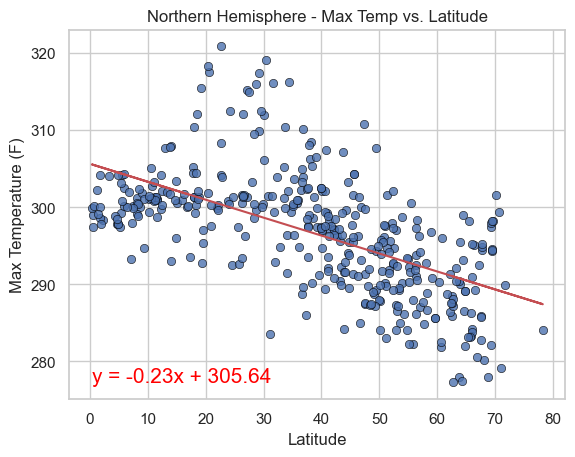

Slope: -0.23303517412515815
Intercept: 305.6429934072639
R-value (correlation coefficient): -0.591098027444178
P-value: 2.1636468995846812e-38
Standard Error: 0.016081689057921185


In [44]:
# temperature vs latitude Linear regression on Northern Hemisphere

def linear_regression_plot(x_values, y_values, xlabel, ylabel, title, save_path=None):
    # Calculate the linear regression model
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

    # Build the scatter plot
    plot = sns.scatterplot(x=x_values, y=y_values, edgecolor="black", alpha=0.8)
    plot.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    # Optionally save the figure
    if save_path:
        plt.savefig(save_path)

    # Show plot
    plt.show()

# Extract x and y values for latitude and temperature in the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function with the appropriate parameters
linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temperature (F)', 'Northern Hemisphere - Max Temp vs. Latitude')

# Results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value (correlation coefficient): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

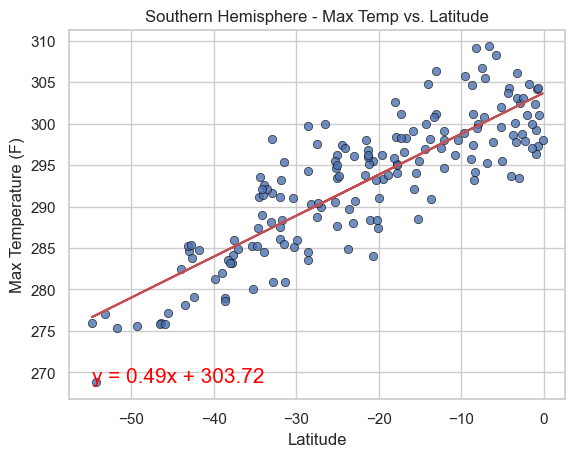

Slope: 0.4938394101769842
Intercept: 303.7187585638277
R-value (correlation coefficient): 0.8465513736218041
P-value: 7.165245642430965e-48
Standard Error: 0.023957416636502048


In [48]:
def linear_regression_plot(x_values, y_values, xlabel, ylabel, title, save_path=None):
    # Calculate the linear regression model
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

    # Build the scatter plot
    plot = sns.scatterplot(x=x_values, y=y_values, edgecolor="black", alpha=0.8)
    plot.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    # Optionally save the figure
    if save_path:
        plt.savefig(save_path)

    # Show plot
    plt.show()

    return slope, intercept, r_value, p_value, std_err

# Extract x and y values for latitude and temperature in the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function with the appropriate parameters
slope, intercept, r_value, p_value, std_err = linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temperature (F)', 'Southern Hemisphere - Max Temp vs. Latitude')

# Print results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value (correlation coefficient): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


**Discussion about the linear relationship:** The results reveal a simple and intuitive pattern: temperatures tend to be higher closer to the equator and lower further from it. In the Northern Hemisphere, moving north (away from the equator) leads to cooler temperatures, while in the Southern Hemisphere, moving closer to the equator (or less far south) leads to warmer temperatures. The correlation coefficients corroborate these relationships, with a moderate negative relationship in the North and a strong positive relationship in the South.

### Humidity vs. Latitude Linear Regression Plot

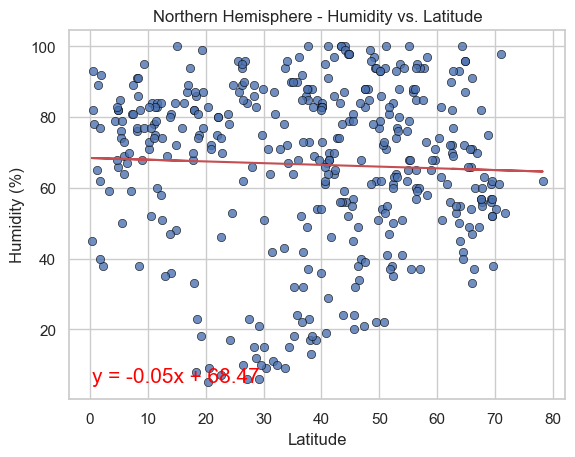

Slope: -0.04887612019350229
Intercept: 68.46794323354071
R-value (correlation coefficient): -0.040819930876996355
P-value: 0.4196766488289393
Standard Error: 0.06050258820149586


In [49]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']


slope, intercept, r_value, p_value, std_err = linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity (%)', 'Northern Hemisphere - Humidity vs. Latitude')

# results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value (correlation coefficient): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


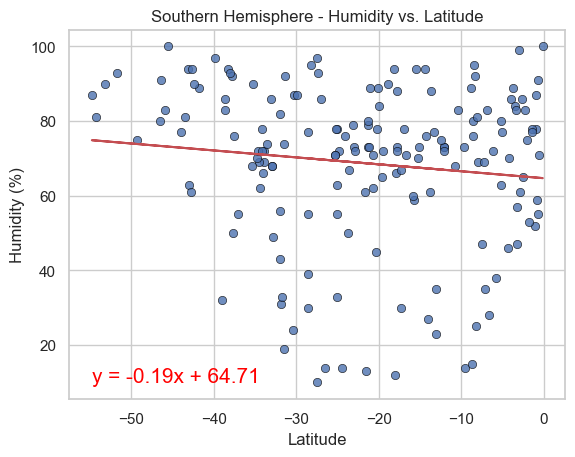

Slope: -0.18582526897988266
Intercept: 64.70827471358402
R-value (correlation coefficient): -0.12038195281792678
P-value: 0.11788793407067173
Standard Error: 0.11822759713313091


In [50]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']


slope, intercept, r_value, p_value, std_err = linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity (%)', 'Southern Hemisphere - Humidity vs. Latitude')

# results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value (correlation coefficient): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


**Discussion about the linear relationship:** in both hemispheres, the relationship between latitude and humidity is weakly negative, but the effect is small, and the correlation is overall weak.

In the Northern Hemisphere, there is virtually no linear relationship between latitude and humidity.
In the Southern Hemisphere, there is a slightly more pronounced (but still weak) negative relationship.
The p-values for both the Northern and Southern Hemispheres are greater than common significance levels (ex: 0.05), suggesting that the observed relationships might not be statistically significant.

these results suggest that latitude doesn't have a strong influence on humidity, and other factors likely have a more significant impact on humidity levels in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

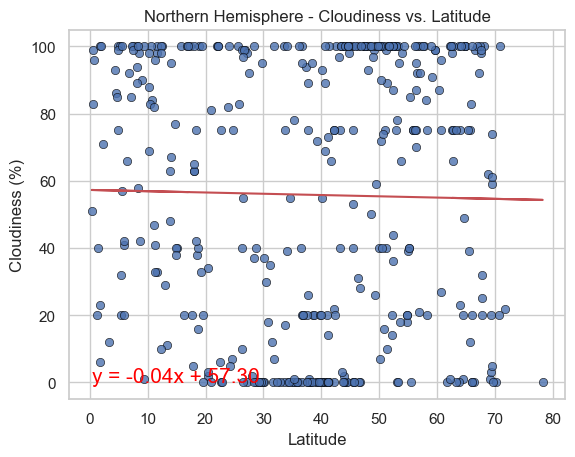

Slope: -0.03798123310241743
Intercept: 57.29736178836095
R-value (correlation coefficient): -0.018535285266785162
P-value: 0.7141347053603567
Standard Error: 0.10361122111601037


In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness (%)', 'Northern Hemisphere - Cloudiness vs. Latitude')

# results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value (correlation coefficient): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

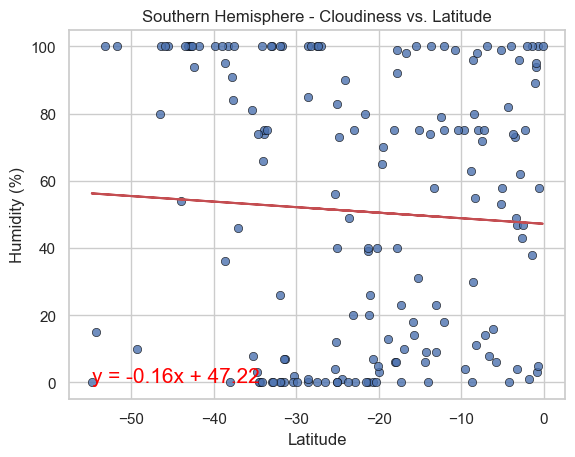

Slope: -0.1649921521984631
Intercept: 47.218572716765934
R-value (correlation coefficient): -0.05736082350670974
P-value: 0.45748909485996214
Standard Error: 0.22155299194741176


In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']


slope, intercept, r_value, p_value, std_err = linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity (%)', 'Southern Hemisphere - Cloudiness vs. Latitude')

# results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value (correlation coefficient): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

**Discussion about the linear relationship:** In both Hemispheres, the relationship between cloudiness and latitude is weak and likely not statistically significant.

In the Northern Hemisphere, there is virtually no correlation between cloudiness and latitude.
In the Southern Hemisphere, the correlation is slightly more pronounced but still very weak.
These results suggest that latitude has little to no influence on cloudiness, and other factors are likely more relevant in determining cloudiness levels. The observed trends in the data may be due to random variation rather than a meaningful linear relationship between the variables.

### Wind Speed vs. Latitude Linear Regression Plot

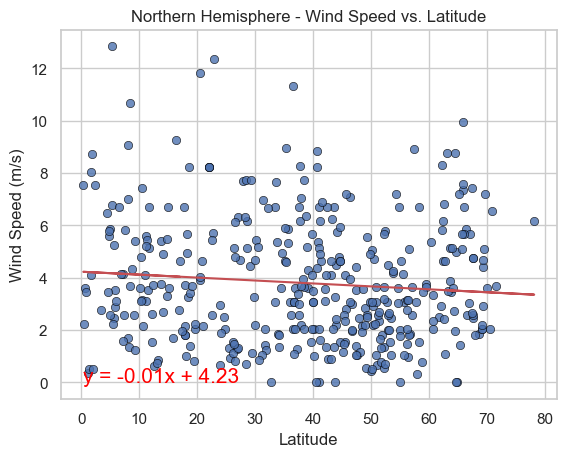

Slope: -0.011203755781402655
Intercept: 4.231854908902667
R-value (correlation coefficient): -0.09298305683166636
P-value: 0.06555756778693222
Standard Error: 0.00606716561480293


In [55]:
#Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']


slope, intercept, r_value, p_value, std_err = linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed (m/s)', 'Northern Hemisphere - Wind Speed vs. Latitude')

#  results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value (correlation coefficient): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


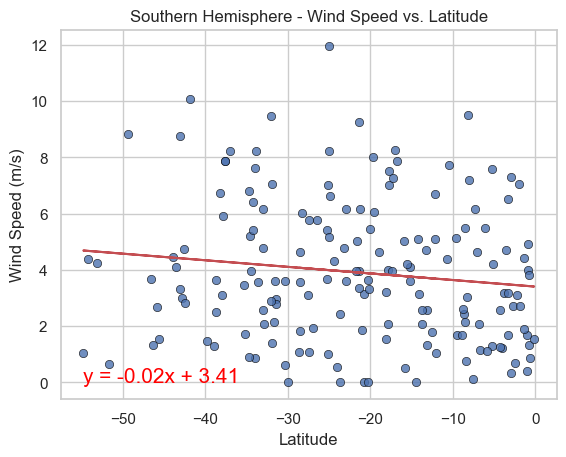

Slope: -0.02340183691706231
Intercept: 3.406035262758578
R-value (correlation coefficient): -0.13013517411251815
P-value: 0.09075338057889067
Standard Error: 0.013755984923222461


In [56]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed (m/s)', 'Southern Hemisphere - Wind Speed vs. Latitude')

# results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value (correlation coefficient): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


**Discussion about the linear relationship:** in both hemispheres, the relationship between wind speed and latitude is weak and likely not statistically significant.

In the Northern Hemisphere, the negative correlation between wind speed and latitude is very slight.
In the Southern Hemisphere, there is a slightly stronger negative correlation, but still very weak.
These results suggest that latitude has little to no influence on wind speed, and other factors may be more relevant in determining wind speed. As with previous variables, the observed trends in the data may be due to random variation or other factors rather than a meaningful linear relationship between wind speed and latitude.